In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!unzip gdrive/My\ Drive/Dataset3.zip

Archive:  gdrive/My Drive/Dataset3.zip
replace Dataset3/Beinolmelal/1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import csv
import glob
import pandas as pd
import os

dirpath = "./Dataset3"
outputpath = 'datasetcsv.csv'
columns_name =["news","label"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
count =0
folders_name = os.listdir(dirpath);
folders_name.remove("__MACOSX")
for folder in folders_name:
  files = os.listdir(dirpath + '/' + folder)
  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n','')
      row = {'news': text_file,'label': folder}
      csvout.writerow(row)
output.close()

In [4]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
df = pd.read_csv('datasetcsv.csv')
df

,news,label
0,به گزارش خبرگزاری صداوسیما مرکز کیش، مدل سازی ...,FarhangHonarVaResane
1,congress is returning from a one_week break fa...,FarhangHonarVaResane
2,وابسته نظامی اوکراین از رزمایشهای برگزار شده د...,FarhangHonarVaResane
3,به گزارش مشرق، یک کاربر فضای مجازی در توییتر ن...,FarhangHonarVaResane
4,به گزارش خبرگزاری صدا و سیما مرکزکرمانشاه ،کار...,FarhangHonarVaResane
...,...,...
29866,تهران (پانا) _ محبوبه نشاط؛ مدیر پژوهش سرای دک...,ElmiVaDaneshghai
29867,برگردیم به اون سنگ نوشته، نامی که بر روی اون د...,ElmiVaDaneshghai
29868,شیایومی همانطور که وعده داده بود، امروز از جدی...,ElmiVaDaneshghai
29869,به گزارش گروه اقتصادی خبرگزاری دانشجو، به نقل ...,ElmiVaDaneshghai


In [6]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['news'].isnull()], '\n')

missing values stats
news     0
label    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [news, label]
Index: [] 



In [7]:
import hazm
import re

In [8]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)

    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)

    return text

df['cleaned_news'] = df['news'].apply(cleaning)
df = df[['cleaned_news', 'label']]
df.columns = ['news', 'label']
df

,news,label
0,به گزارش خبرگزاری صداوسیما مرکز کیش، مدل‌سازی ...,FarhangHonarVaResane
1,congress is returning from a one_week break fa...,FarhangHonarVaResane
2,وابسته نظامی اوکراین از رزمایشهای برگزار شده د...,FarhangHonarVaResane
3,به گزارش مشرق، یک کاربر فضای مجازی در توییتر ن...,FarhangHonarVaResane
4,به گزارش خبرگزاری صدا و سیما مرکزکرمانشاه، کار...,FarhangHonarVaResane
...,...,...
29866,تهران (پانا) _ محبوبه نشاط؛ مدیر پژوهش سرای دک...,ElmiVaDaneshghai
29867,برگردیم به اون سنگ‌نوشته، نامی که بر روی اون د...,ElmiVaDaneshghai
29868,شیایومی همانطور که وعده داده بود، امروز از جدی...,ElmiVaDaneshghai
29869,به گزارش گروه اقتصادی خبرگزاری دانشجو، به نقل ...,ElmiVaDaneshghai


Varzeshi                5000
Beinolmelal             4958
FarhangHonarVaResane    4000
Ejtemaee                4000
Eghtesadi               3994
ElmiVaDaneshghai        3982
Siasi                   3937
Name: label, dtype: int64


<Axes: >

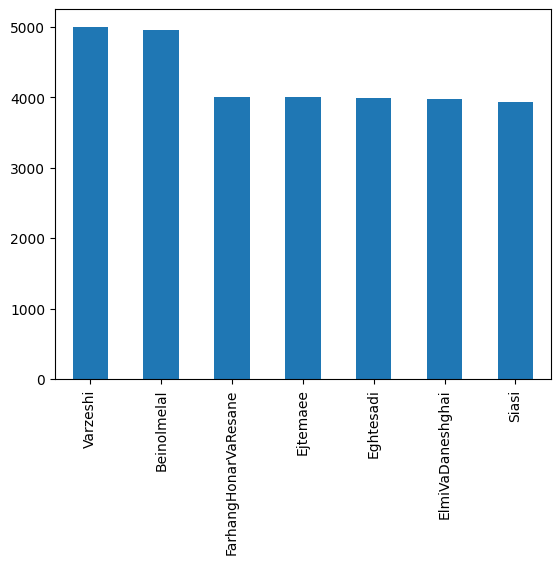

In [9]:
count = df['label'].value_counts()

print(count)
count.plot.bar()

In [10]:
labels = list(sorted(df['label'].unique()))
labels

['Beinolmelal',
 'Eghtesadi',
 'Ejtemaee',
 'ElmiVaDaneshghai',
 'FarhangHonarVaResane',
 'Siasi',
 'Varzeshi']

In [11]:
df['label_id'] = df['label'].apply(lambda t: labels.index(t))
df

,news,label,label_id
0,به گزارش خبرگزاری صداوسیما مرکز کیش، مدل‌سازی ...,FarhangHonarVaResane,4
1,congress is returning from a one_week break fa...,FarhangHonarVaResane,4
2,وابسته نظامی اوکراین از رزمایشهای برگزار شده د...,FarhangHonarVaResane,4
3,به گزارش مشرق، یک کاربر فضای مجازی در توییتر ن...,FarhangHonarVaResane,4
4,به گزارش خبرگزاری صدا و سیما مرکزکرمانشاه، کار...,FarhangHonarVaResane,4
...,...,...,...
29866,تهران (پانا) _ محبوبه نشاط؛ مدیر پژوهش سرای دک...,ElmiVaDaneshghai,3
29867,برگردیم به اون سنگ‌نوشته، نامی که بر روی اون د...,ElmiVaDaneshghai,3
29868,شیایومی همانطور که وعده داده بود، امروز از جدی...,ElmiVaDaneshghai,3
29869,به گزارش گروه اقتصادی خبرگزاری دانشجو، به نقل ...,ElmiVaDaneshghai,3


In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=1, stratify=df['label'])
train, valid = train_test_split(train, test_size=0.1, random_state=1, stratify=train['label'])

train = train.reset_index(drop=True)
valid = valid.reset_index(drop=True)
test = test.reset_index(drop=True)

x_train, y_train = train['news'].values.tolist(), train['label_id'].values.tolist()
x_valid, y_valid = valid['news'].values.tolist(), valid['label_id'].values.tolist()
x_test, y_test = test['news'].values.tolist(), test['label_id'].values.tolist()

In [13]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.9 MB/s eta 0:00:00


In [14]:
from transformers import BertConfig, BertTokenizer
from transformers import TFBertModel, TFBertForSequenceClassification
from transformers import glue_convert_examples_to_features

import tensorflow as tf

In [15]:
MAX_LEN = 128
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8
TEST_BATCH_SIZE = 8

EPOCHS = 2
EEVERY_EPOCH = 1000
LEARNING_RATE = 2e-5
CLIP = 0.0

MODEL_NAME = 'HooshvareLab/bert-fa-base-uncased'

In [16]:
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'Beinolmelal': 0, 'Eghtesadi': 1, 'Ejtemaee': 2, 'ElmiVaDaneshghai': 3, 'FarhangHonarVaResane': 4, 'Siasi': 5, 'Varzeshi': 6}
id2label: {0: 'Beinolmelal', 1: 'Eghtesadi', 2: 'Ejtemaee', 3: 'ElmiVaDaneshghai', 4: 'FarhangHonarVaResane', 5: 'Siasi', 6: 'Varzeshi'}


In [17]:
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
config = BertConfig.from_pretrained(
    MODEL_NAME, **{
        'label2id': label2id,
        'id2label': id2label,
    })

print(config.to_json_string())

{
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Beinolmelal",
    "1": "Eghtesadi",
    "2": "Ejtemaee",
    "3": "ElmiVaDaneshghai",
    "4": "FarhangHonarVaResane",
    "5": "Siasi",
    "6": "Varzeshi"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Beinolmelal": 0,
    "Eghtesadi": 1,
    "Ejtemaee": 2,
    "ElmiVaDaneshghai": 3,
    "FarhangHonarVaResane": 4,
    "Siasi": 5,
    "Varzeshi": 6
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.30.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}



In [18]:
def build_model(model_name, config, learning_rate=3e-5):
    model = TFBertForSequenceClassification.from_pretrained(model_name, config=config)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    return model
model = build_model(MODEL_NAME, config, learning_rate=LEARNING_RATE)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-fa-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
from tqdm.notebook import tqdm
import numpy as np
class InputExample:
    """ A single example for simple sequence classification. """

    def __init__(self, guid, text_a, text_b=None, label=None):
        """ Constructs a InputExample. """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label


def make_examples(tokenizer, x, y=None, maxlen=128, output_mode="classification", is_tf_dataset=True):
    examples = []
    y = y if isinstance(y, list) or isinstance(y, np.ndarray) else [None] * len(x)

    for i, (_x, _y) in tqdm(enumerate(zip(x, y)), position=0, total=len(x)):
        guid = "%s" % i
        label = int(_y)

        if isinstance(_x, str):
            text_a = _x
            text_b = None
        else:
            assert len(_x) == 2
            text_a = _x[0]
            text_b = _x[1]

        examples.append(InputExample(guid=guid, text_a=text_a, text_b=text_b, label=label))

    features = glue_convert_examples_to_features(
        examples,
        tokenizer,
        maxlen,
        output_mode=output_mode,
        label_list=list(np.unique(y)))

    all_input_ids = []
    all_attention_masks = []
    all_token_type_ids = []
    all_labels = []

    for f in tqdm(features, position=0, total=len(examples)):
        if is_tf_dataset:
            all_input_ids.append(tf.constant(f.input_ids))
            all_attention_masks.append(tf.constant(f.attention_mask))
            all_token_type_ids.append(tf.constant(f.token_type_ids))
            all_labels.append(tf.constant(f.label))
        else:
            all_input_ids.append(f.input_ids)
            all_attention_masks.append(f.attention_mask)
            all_token_type_ids.append(f.token_type_ids)
            all_labels.append(f.label)

    if is_tf_dataset:
        dataset = tf.data.Dataset.from_tensor_slices(({
            'input_ids': all_input_ids,
            'attention_mask': all_attention_masks,
            'token_type_ids': all_token_type_ids
        }, all_labels))

        return dataset, features

    xdata = [np.array(all_input_ids), np.array(all_attention_masks), np.array(all_token_type_ids)]
    ydata = all_labels

    return [xdata, ydata], features

In [20]:
train_dataset_base, train_examples = make_examples(tokenizer, x_train, y_train, maxlen=128)
valid_dataset_base, valid_examples = make_examples(tokenizer, x_valid, y_valid, maxlen=128)

test_dataset_base, test_examples = make_examples(tokenizer, x_test, y_test, maxlen=128)
[xtest, ytest], test_examples = make_examples(tokenizer, x_test, y_test, maxlen=128, is_tf_dataset=False)

  0%|          | 0/21506 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/processors/glue.py:66: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)


  0%|          | 0/21506 [00:00<?, ?it/s]

  0%|          | 0/2390 [00:00<?, ?it/s]

  0%|          | 0/2390 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

In [21]:
def get_training_dataset(dataset, batch_size):
    dataset = dataset.repeat()
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(batch_size)

    return dataset

def get_validation_dataset(dataset, batch_size):
    dataset = dataset.batch(batch_size)

    return dataset

In [22]:
train_dataset = get_training_dataset(train_dataset_base, TRAIN_BATCH_SIZE)
valid_dataset = get_training_dataset(valid_dataset_base, VALID_BATCH_SIZE)

train_steps = len(train_examples) // TRAIN_BATCH_SIZE
valid_steps = len(valid_examples) // VALID_BATCH_SIZE


In [23]:
r = model.fit(train_dataset,validation_data=valid_dataset,steps_per_epoch=train_steps,validation_steps=valid_steps,epochs=EPOCHS,verbose=1)

final_accuracy = r.history['val_accuracy']

print('FINAL ACCURACY: ', np.mean(final_accuracy))

Epoch 1/2
2688/2688 [==============================] - 803s 278ms/step - loss: 0.5814 - accuracy: 0.8136 - val_loss: 0.4604 - val_accuracy: 0.8582
Epoch 2/2
2688/2688 [==============================] - 743s 277ms/step - loss: 0.3191 - accuracy: 0.8976 - val_loss: 0.4871 - val_accuracy: 0.8536
FINAL ACCURACY:  0.8559144139289856


In [25]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  162841344 
                                                                 
 dropout_37 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  5383      
                                                                 
Total params: 162,846,727
Trainable params: 162,846,727
Non-trainable params: 0
_________________________________________________________________


In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
ev = model.evaluate(test_dataset_base.batch(8))
print()
print(f'Evaluation: {ev}')
print()


predictions = model.predict(xtest)
ypred = predictions[0].argmax(axis=-1).tolist()

print()
print(classification_report(ytest, ypred, target_names=labels))
print()

print(f'F1: {f1_score(ytest, ypred, average="weighted")}')

747/747 [==============================] - 66s 88ms/step - loss: 0.4857 - accuracy: 0.8586

Evaluation: [0.4857082664966583, 0.8585774302482605]

187/187 [==============================] - 57s 288ms/step

                      precision    recall  f1-score   support

         Beinolmelal       0.87      0.91      0.89       992
           Eghtesadi       0.80      0.86      0.83       799
            Ejtemaee       0.88      0.72      0.79       800
    ElmiVaDaneshghai       0.85      0.81      0.83       797
FarhangHonarVaResane       0.83      0.88      0.85       800
               Siasi       0.80      0.83      0.82       787
            Varzeshi       0.95      0.96      0.96      1000

            accuracy                           0.86      5975
           macro avg       0.86      0.85      0.85      5975
        weighted avg       0.86      0.86      0.86      5975


F1: 0.8577771717983759


In [27]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(ytest, ypred, average='weighted')

(0.8598921896673982, 0.8585774058577406, 0.8577771717983759, None)

<Axes: >

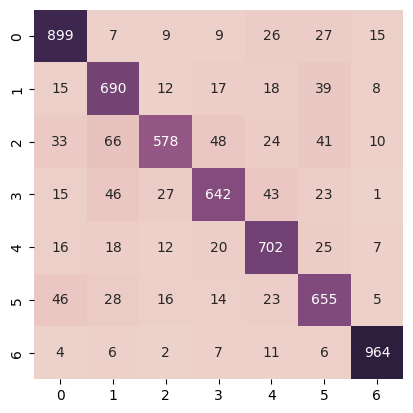

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(ytest, ypred)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [31]:
print(xtest)

[array([[    2,  2789,  3361, ..., 31784, 13664,     4],
       [    2,  3876, 19777, ...,  3052,  3100,     4],
       [    2,  7060,  1379, ..., 29553,  2032,     4],
       ...,
       [    2,  4550,  2927, ..., 51686,  2803,     4],
       [    2,  2789,  3361, ..., 10323,  4650,     4],
       [    2,  3052, 12915, ..., 11281,  3945,     4]]), array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])]


In [29]:
save_path = '/content/gdrive/MyDrive/IRPrj'
model.save_pretrained(save_path)

In [24]:
from transformers import TFBertForSequenceClassification

In [30]:
loaded_model = TFBertForSequenceClassification.from_pretrained(save_path)

Some layers from the model checkpoint at /content/gdrive/MyDrive/IRPrj were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/gdrive/MyDrive/IRPrj.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [36]:
!unzip gdrive/My\ Drive/Test.zip

Archive:  gdrive/My Drive/Test.zip
   creating: Test/
  inflating: Test/1.txt              


In [51]:
dirpath = "./Test"
outputpath = 'testcsv.csv'
columns_name =["news", "label"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
count =0
folders_name = os.listdir(dirpath);
# folders_name.remove("__MACOSX")
# for folder in folders_name:
files = os.listdir(dirpath + '/')
for f in files :
    with open(dirpath + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n','')
      row = {'news': text_file, 'label': "Siasi"}
      csvout.writerow(row)
output.close()

In [52]:
df = pd.read_csv('testcsv.csv')
df

,news,label
0,به گزارش خبرنگار سياسي ايسنا،‌ محمدي در ابتد...,Siasi


In [ ]:
df['cleaned_news'] = df['news'].apply(cleaning)
df = df[['cleaned_news', 'label']]
df.columns = ['news', 'label']
df

In [53]:
df['label_id'] = df['label'].apply(lambda t: labels.index(t))

In [55]:
x_test, y_test = test['news'].values.tolist(), test['label_id'].values.tolist()

In [56]:
test_dataset_base, test_examples = make_examples(tokenizer, x_test,y_test, maxlen=128)
[xtest, ytest], test_examples = make_examples(tokenizer, x_test,y_test, maxlen=128, is_tf_dataset=False)

  0%|          | 0/5975 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/data/processors/glue.py:66: FutureWarning: This function will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py
  warnings.warn(DEPRECATION_WARNING.format("function"), FutureWarning)


  0%|          | 0/5975 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

  0%|          | 0/5975 [00:00<?, ?it/s]

In [58]:
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loaded_model.compile(optimizer, loss)

In [64]:
ev = loaded_model.evaluate(test_dataset_base.batch(8))
print()
print(f'Evaluation: {ev}')
print()


predictions = loaded_model.predict(xtest)
ypred = predictions[0].argmax(axis=-1).tolist()

print()
print(classification_report(ytest, ypred, target_names=labels))
print()

print(f'F1: {f1_score(ytest, ypred, average="weighted")}')

747/747 [==============================] - 66s 88ms/step - loss: 0.4857

Evaluation: 0.4857082664966583



ValueError: ignored

In [60]:
print(ypred)

[6, 3, 1, 3, 4, 1, 6, 2, 2, 3, 3, 6, 4, 5, 5, 4, 0, 3, 0, 1, 5, 3, 3, 6, 6, 4, 4, 4, 1, 2, 0, 1, 5, 6, 6, 0, 0, 0, 0, 1, 5, 3, 0, 0, 1, 3, 2, 5, 6, 5, 0, 3, 6, 5, 1, 2, 1, 0, 3, 6, 0, 3, 0, 3, 4, 4, 3, 6, 5, 4, 2, 4, 6, 3, 6, 2, 2, 6, 6, 1, 3, 4, 1, 3, 5, 1, 6, 5, 2, 1, 1, 4, 0, 3, 1, 5, 5, 2, 2, 6, 4, 1, 5, 3, 2, 5, 2, 4, 6, 3, 2, 2, 3, 3, 0, 3, 3, 0, 3, 3, 2, 2, 3, 6, 0, 2, 4, 6, 5, 1, 6, 0, 2, 0, 3, 6, 0, 2, 4, 4, 1, 3, 1, 5, 0, 6, 4, 4, 4, 5, 1, 0, 3, 1, 5, 5, 5, 5, 0, 4, 2, 0, 5, 1, 2, 1, 3, 4, 1, 0, 1, 6, 1, 2, 1, 2, 5, 0, 2, 1, 1, 3, 1, 0, 3, 6, 1, 6, 3, 6, 3, 2, 5, 3, 0, 3, 3, 0, 1, 5, 5, 0, 5, 4, 6, 0, 6, 4, 5, 1, 1, 1, 5, 0, 4, 1, 5, 3, 1, 4, 6, 4, 0, 3, 0, 5, 6, 0, 5, 1, 4, 0, 2, 3, 6, 2, 3, 4, 0, 5, 3, 6, 0, 0, 0, 1, 5, 1, 1, 4, 6, 6, 2, 0, 4, 6, 3, 1, 6, 1, 4, 4, 0, 2, 6, 0, 0, 3, 1, 0, 0, 1, 0, 5, 0, 2, 5, 0, 6, 3, 1, 2, 1, 3, 5, 5, 6, 3, 3, 2, 2, 2, 6, 4, 2, 0, 5, 5, 4, 5, 5, 1, 5, 1, 4, 6, 0, 0, 3, 4, 6, 2, 4, 6, 2, 5, 3, 4, 2, 0, 5, 2, 2, 4, 6, 5, 6, 6, 2, 1, 3, 3, 6, 

In [61]:
print(ytest)

[6, 6, 2, 0, 4, 1, 6, 2, 2, 3, 2, 6, 4, 5, 5, 4, 0, 2, 0, 4, 0, 3, 2, 6, 6, 4, 4, 4, 2, 2, 4, 5, 5, 6, 6, 1, 0, 2, 0, 1, 5, 2, 0, 0, 1, 3, 2, 2, 6, 1, 0, 3, 6, 5, 1, 5, 1, 0, 3, 6, 0, 0, 0, 3, 4, 4, 3, 6, 5, 4, 2, 4, 4, 3, 6, 2, 2, 6, 6, 3, 3, 2, 1, 3, 5, 1, 6, 5, 2, 1, 1, 4, 0, 3, 5, 5, 5, 2, 2, 6, 4, 1, 1, 3, 2, 5, 3, 4, 6, 3, 2, 2, 3, 3, 2, 3, 3, 5, 3, 3, 2, 2, 3, 6, 0, 2, 4, 6, 5, 1, 6, 0, 2, 0, 3, 6, 0, 3, 4, 4, 1, 3, 1, 1, 0, 6, 4, 3, 6, 5, 5, 0, 3, 3, 1, 5, 5, 5, 0, 4, 2, 0, 5, 1, 2, 1, 3, 4, 1, 2, 5, 6, 1, 2, 2, 2, 5, 0, 4, 1, 1, 3, 1, 0, 3, 6, 1, 6, 3, 6, 5, 5, 5, 3, 0, 2, 3, 0, 0, 4, 0, 1, 5, 4, 6, 0, 6, 0, 5, 1, 0, 5, 5, 0, 1, 1, 5, 3, 1, 4, 6, 4, 0, 3, 0, 5, 6, 0, 5, 1, 4, 0, 2, 3, 6, 2, 3, 0, 0, 4, 3, 6, 0, 0, 0, 1, 5, 1, 1, 3, 6, 6, 2, 0, 3, 6, 1, 1, 6, 1, 3, 4, 0, 2, 6, 0, 0, 3, 1, 0, 0, 1, 0, 5, 0, 2, 2, 0, 6, 3, 1, 2, 1, 3, 5, 5, 6, 3, 3, 5, 2, 2, 6, 4, 2, 0, 1, 5, 4, 5, 5, 1, 5, 1, 4, 6, 0, 0, 3, 4, 6, 2, 4, 6, 2, 0, 3, 4, 1, 0, 5, 2, 2, 4, 6, 5, 2, 6, 2, 5, 3, 3, 6, 